# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd

root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

In [2]:
## Read csv of training_data and targets
train_data = pd.read_csv(training_data_path)
target = pd.read_csv(training_targets_path)
train_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [3]:
target.head()

,TARGET_deathRate
0,199.5
1,137.1
2,126.9
3,173.8
4,179.8


array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>,
        <Axes: title={'center': 'povertyPercent'}>],
       [<Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>,
        <Axes: title={'center': 'PercentMarried'}>],
       [<Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctSomeCol18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>,
        <Axes: title={'center': 'PctBachDeg25_Over'}>],
       [<Axes: title={'center': 'PctEmployed16_Over'}>,
        <Axes: title={'ce

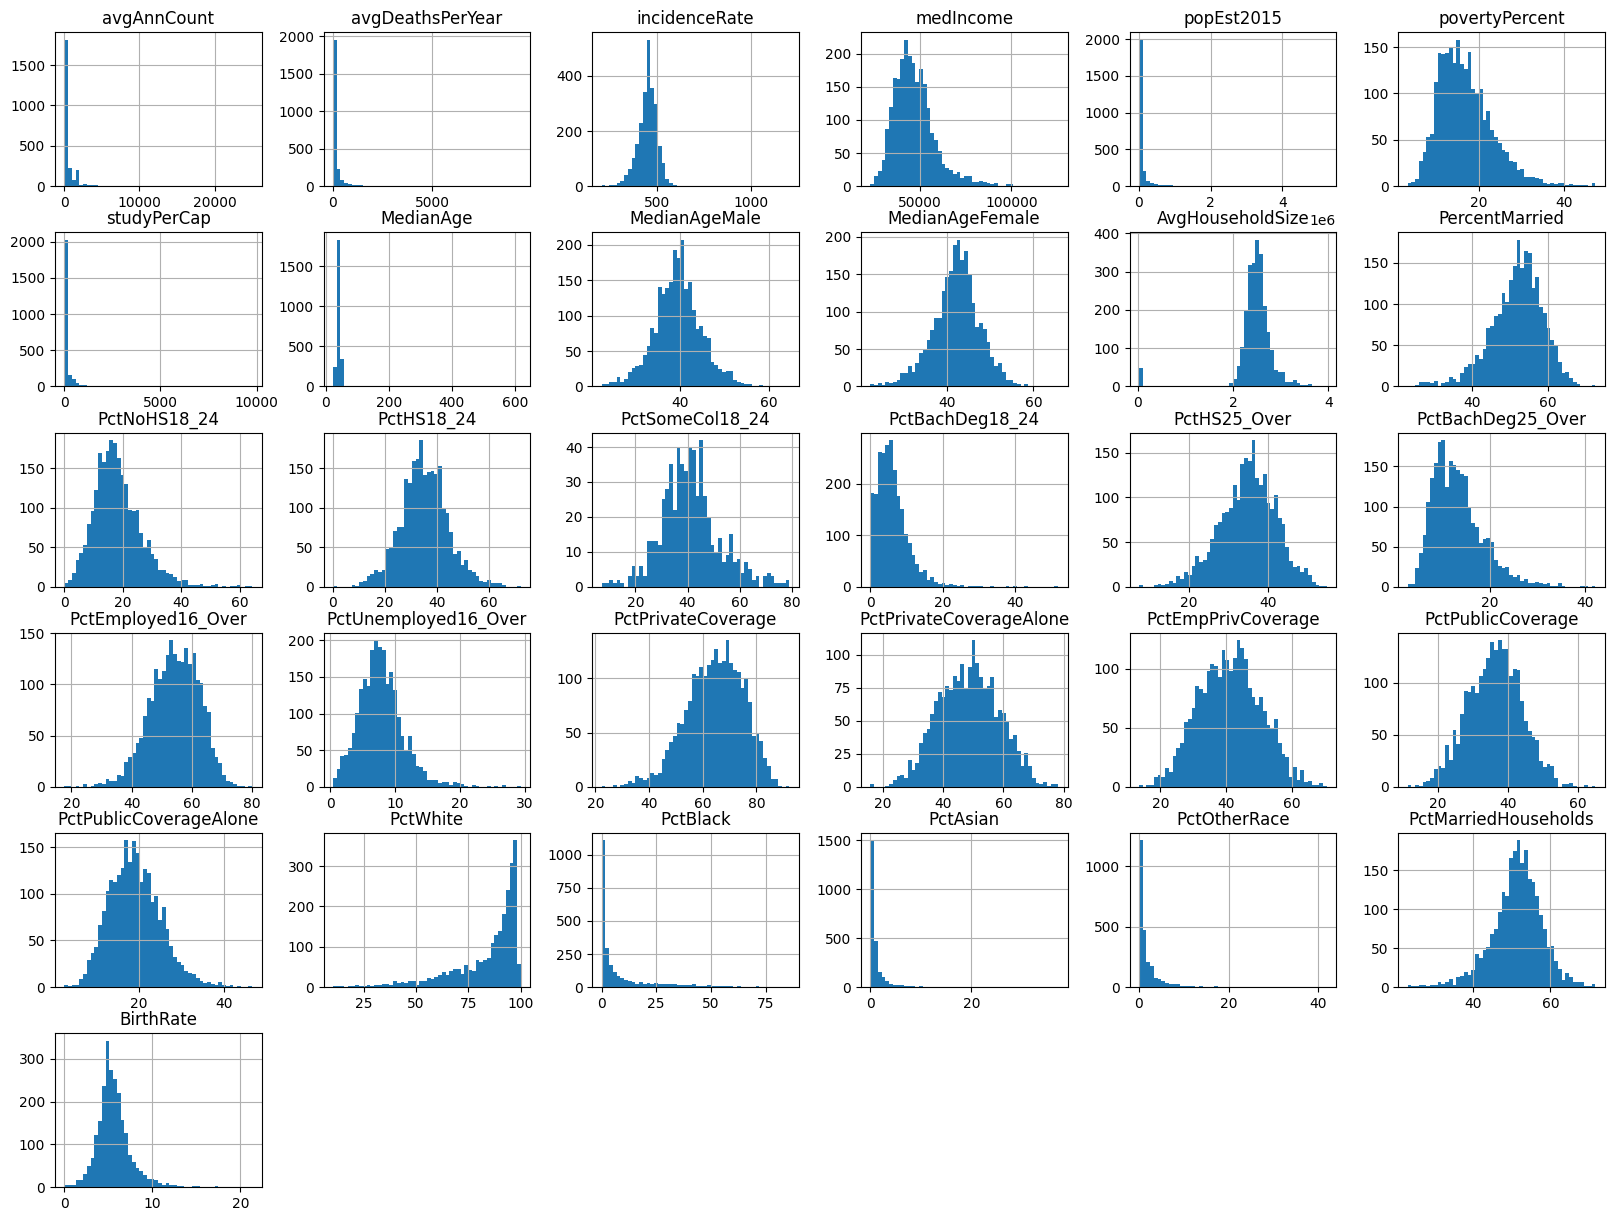

In [4]:
## Plot the histogram and identify the outliers
%matplotlib inline
import matplotlib.pyplot as plt

train_data.hist(bins = 50, figsize = (20, 15))

#### Comment:
There are the outliers in some features of "avgAnnCount", "avgDeathsPerYear", "incidenceRate", "popEst2015", "studyPerCap", "MedianAge", "PctBachDeg18_24", "PctWhite", "PctBlack", "PctAsian", and "PctOtherRace" because it's obviously seen that the distributions are skew drastically according to the above histograms. 

In [5]:
## Compute the correlations
comp_corr = train_data.copy()
comp_corr['TARGET_deathRate'] = target['TARGET_deathRate']
corr = comp_corr.corr()
corr = corr['TARGET_deathRate'].abs().sort_values(ascending=False)
print("Top five correlation:\n{}".format(corr[1:6]))

Top five correlation:
PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
Name: TARGET_deathRate, dtype: float64


<Axes: xlabel='PctBachDeg25_Over', ylabel='TARGET_deathRate'>

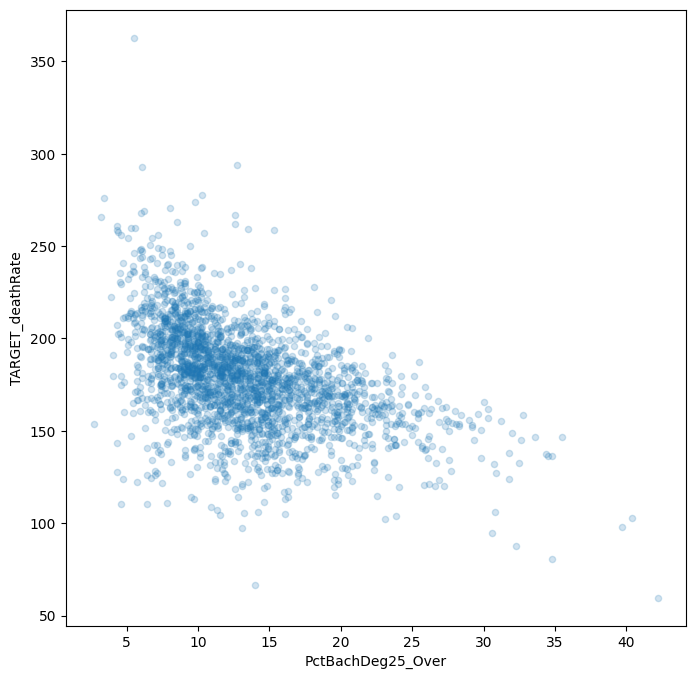

In [6]:
## Correlation between "PctBachDeg25_Over" and "TARGET_deathRate"
comp_corr.plot(kind = "scatter", x = "PctBachDeg25_Over", y = "TARGET_deathRate", alpha = 0.2, figsize = (8, 8))

#### Comment:
There is an inverse correlation between "PctBachDeg25_Over" and "TARGET_deathRate" which mean if value of "PctBachDeg25_Over" increases, decreasing of "TARGET_deathRate" value would occur.

<Axes: xlabel='incidenceRate', ylabel='TARGET_deathRate'>

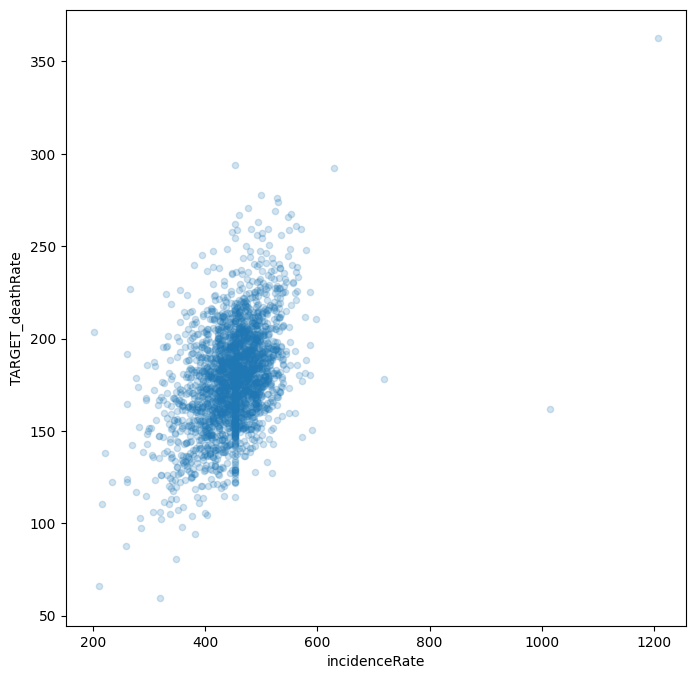

In [7]:
## Correlation between "incidenceRate" and "TARGET_deathRate"
comp_corr.plot(kind = "scatter", x = "incidenceRate", y = "TARGET_deathRate", alpha = 0.2, figsize = (8, 8))

#### Comment:
There is a correlation between "incidenceRate" and "TARGET_deathRate" which mean if value of "incidenceRate" increases, "TARGET_deathRate" value would also rise.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

In [8]:
## Explore the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

## Create pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "mean")),
    ('std_scaler', StandardScaler())
])

train_data_tr = num_pipeline.fit_transform(train_data)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Sample Answer to Exercise 3**

RMSE of Linear Regression: 18.929
The best alpha of Lasso Regression: 0.100
RMSE of Lasso Regression: 18.907
The best alpha of Ridge Regression: 32.400
RMSE of Ridge Regression: 18.917


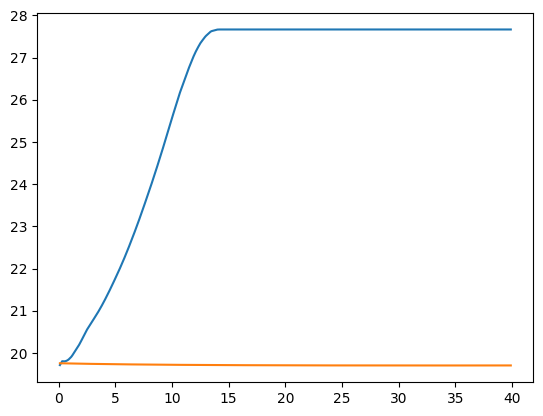

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Split train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(train_data_tr, target, test_size= 0.3, random_state=42)


## Linear Regression model
Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)

Linear_reg_pred = Linear_reg.predict(X_valid)
Linear_reg_mse = mean_squared_error(Linear_reg_pred, y_valid)
Linear_reg_rmse = np.sqrt(Linear_reg_mse)
print("RMSE of Linear Regression: {:.3f}".format(Linear_reg_rmse))


## Lasso Regression model
Lasso_reg = Lasso()
Lasso_reg.fit(X_train, y_train)

alphas = list(np.arange(-10, 40, 0.1))
param_grid = {'alpha': alphas}

# Find the best value of regularisation weight
Lasso_reg_gs = GridSearchCV(Lasso_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
Lasso_reg_gs.fit(X_train, y_train)
Lasso_reg_cv_res = Lasso_reg_gs.cv_results_
Lasso_reg_alpha = Lasso_reg_gs.best_params_['alpha']   # best alpha
print("The best alpha of Lasso Regression: {:.3f}".format(Lasso_reg_alpha))
plt.plot(alphas, np.sqrt(-Lasso_reg_cv_res["mean_test_score"]), label = 'lasso_rmse')

Lasso_reg = Lasso(alpha = Lasso_reg_alpha)
Lasso_reg.fit(X_train, y_train)

Lasso_reg_pred = Lasso_reg.predict(X_valid)
Lasso_reg_mse = mean_squared_error(Lasso_reg_pred, y_valid)
Lasso_reg_rmse = np.sqrt(Lasso_reg_mse)
print("RMSE of Lasso Regression: {:.3f}".format(Lasso_reg_rmse))


## Ridge Regression model
Ridge_reg = Ridge()
Ridge_reg.fit(X_train, y_train)

# Find the best value of regularisation weight
Ridge_reg_gs = GridSearchCV(Ridge_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
Ridge_reg_gs.fit(X_train, y_train)
Ridge_reg_cv_res = Ridge_reg_gs.cv_results_
Ridge_reg_alpha = Ridge_reg_gs.best_params_['alpha']   # best alpha
print("The best alpha of Ridge Regression: {:.3f}".format(Ridge_reg_alpha))
plt.plot(alphas, np.sqrt(-Ridge_reg_cv_res["mean_test_score"]), label = 'ridge_rmse')

Ridge_reg = Ridge(alpha = Ridge_reg_alpha)
Ridge_reg.fit(X_train, y_train)

Ridge_reg_pred = Ridge_reg.predict(X_valid)
Ridge_reg_mse = mean_squared_error(Ridge_reg_pred, y_valid)
Ridge_reg_rmse = np.sqrt(Ridge_reg_mse)
print("RMSE of Ridge Regression: {:.3f}".format(Ridge_reg_rmse))

#### Comment:
In this report, it discovers the best alpha by computing negative mean squared error of alpha being between -10 to 40 (increase every 0.1), and to identify clearly, plotting the root mean squared is showed in the graph above which optimal alpha is at the lowest point.

Among three models, Lasso regression seems to be the best performances at rmse accounting for 18.907.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [11]:
## The top five most important/relevant features 
Lasso_feature_coef = np.abs(Lasso_reg.coef_)
Lasso_attr = list(train_data.columns)
Lasso_feature_imp = sorted(zip(Lasso_feature_coef, Lasso_attr), reverse = True)

print("Top 5 important features of Lasso Regression are")
for i, (imp, fea) in enumerate(Lasso_feature_imp[:5]):
    print("{0}. {1}: {2:.3f}".format(i + 1, fea, imp))

Top 5 important features of Lasso Regression are
1. incidenceRate: 10.556
2. PctBachDeg25_Over: 7.615
3. PctPrivateCoverage: 6.160
4. PctMarriedHouseholds: 5.930
5. PercentMarried: 5.289


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

In [12]:
from sklearn.ensemble import RandomForestRegressor

## Fix Random Forest Regression model
Forest_reg = RandomForestRegressor()
Forest_reg.fit(X_train, y_train)

Forest_reg_pred = Forest_reg.predict(X_valid)
Forest_reg_mse = mean_squared_error(Forest_reg_pred, y_valid)
Forest_reg_rmse = np.sqrt(Forest_reg_mse)

## Compare and report the best performance
print("RMSE of Lasso Regression: {:.3f}".format(Lasso_reg_rmse))
print("RMSE of Random Forest Regression: {:.3f}".format(Forest_reg_rmse))
if Lasso_reg_rmse > Forest_reg_rmse:
    print("\nIt seems that Random Forest Regression has a better performance comparing with Lasso Regression.")
else:
    print("\nIt seems that Lasso Regression has a better performance comparing with Random Forest Regression.")

RMSE of Lasso Regression: 18.907
RMSE of Random Forest Regression: 19.368

It seems that Lasso Regression has a better performance comparing with Random Forest Regression.


In [14]:
## The top five most important/relevant features 
Forest_feature_coef = Forest_reg.feature_importances_
Forest_attr = list(train_data.columns)
Forest_feature_imp = sorted(zip(Forest_feature_coef, Forest_attr), reverse = True)

print("Top 5 important features of Random Forest Regression are")
for i, (imp, fea) in enumerate(Forest_feature_imp[:5]):
    print("{0}. {1}: {2:.3f}".format(i + 1, fea, imp))
    
print("\nTop 5 important features of Lasso Regression are")
for i, (imp, fea) in enumerate(Lasso_feature_imp[:5]):
    print("{0}. {1}: {2:.3f}".format(i + 1, fea, imp))

Top 5 important features of Random Forest Regression are
1. PctBachDeg25_Over: 0.215
2. incidenceRate: 0.203
3. medIncome: 0.054
4. PctHS25_Over: 0.043
5. avgDeathsPerYear: 0.041

Top 5 important features of Lasso Regression are
1. incidenceRate: 10.556
2. PctBachDeg25_Over: 7.615
3. PctPrivateCoverage: 6.160
4. PctMarriedHouseholds: 5.930
5. PercentMarried: 5.289


#### Comment:
The values of feature importances of Random Forest Regression are very low compared with that of Lasso Regression because RFR feature importances come from the feature scoring, whereas Lasso feature importances are the value of coefficients which relates directly to feature importances. However, the common features are "PctBachDeg25_Over" and "incidenceRate" because they are showed similarly in both methods.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [15]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



In [16]:
## Retrain the best regression model (Lasso Regression)
Lasso_reg = Lasso(alpha = Lasso_reg_alpha)
Lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.09999999999996412)

In [17]:
## Input unseen test data
test_data_tr = num_pipeline.fit_transform(test_data)
Lasso_reg_pred = Lasso_reg.predict(test_data_tr)
Lasso_reg_mse = mean_squared_error(Lasso_reg_pred, test_targets)
Lasso_reg_rmse = np.sqrt(Lasso_reg_mse)
print("=== Test data example ==== \n{}".format(test_data[:5]))
print("\n=== Predicted targets example === \n{}".format(Lasso_reg_pred[:5]))
print("\nRMSE of Lasso Regression: {:.3f}".format(Lasso_reg_rmse))

=== Test data example ==== 
   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0        173.0                80          409.9      44076       36223   
1        777.0               291          475.2      49061      150346   
2      38150.0             14010          405.5      55686    10170292   
3        102.0                51          442.5      34916       16779   
4        108.0                41          364.1      72510       41764   

   povertyPercent  studyPerCap  MedianAge  MedianAgeMale  MedianAgeFemale  \
0            20.3     0.000000       39.2           38.0             40.0   
1            12.9   525.454618       39.4           37.6             41.3   
2            18.7   255.941521       35.6           34.4             36.8   
3            23.0    59.598307       41.1           38.9             42.9   
4             9.8     0.000000       33.3           32.2             34.1   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCo

# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [18]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


In [19]:
## Import train_data
train = pd.read_csv(data_features_path)
train.head()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.00
1,72.0,0,0.380,6.000,4.100,1.70
2,55.0,0,0.260,4.000,3.420,1.00
3,60.0,0,0.253,12.062,4.603,1.45
4,57.0,0,0.160,22.000,5.750,2.25


In [20]:
## Import target data
target = pd.read_csv(data_targets_path)
target.head()

,Target-class
0,0
1,0
2,0
3,0
4,0


array([[<Axes: title={'center': 'AgeAtHeartAttack'}>,
        <Axes: title={'center': 'PericardialEffusion'}>],
       [<Axes: title={'center': 'FractionalShortening'}>,
        <Axes: title={'center': 'epss'}>],
       [<Axes: title={'center': 'lvdd'}>,
        <Axes: title={'center': 'WallMotionIndex'}>]], dtype=object)

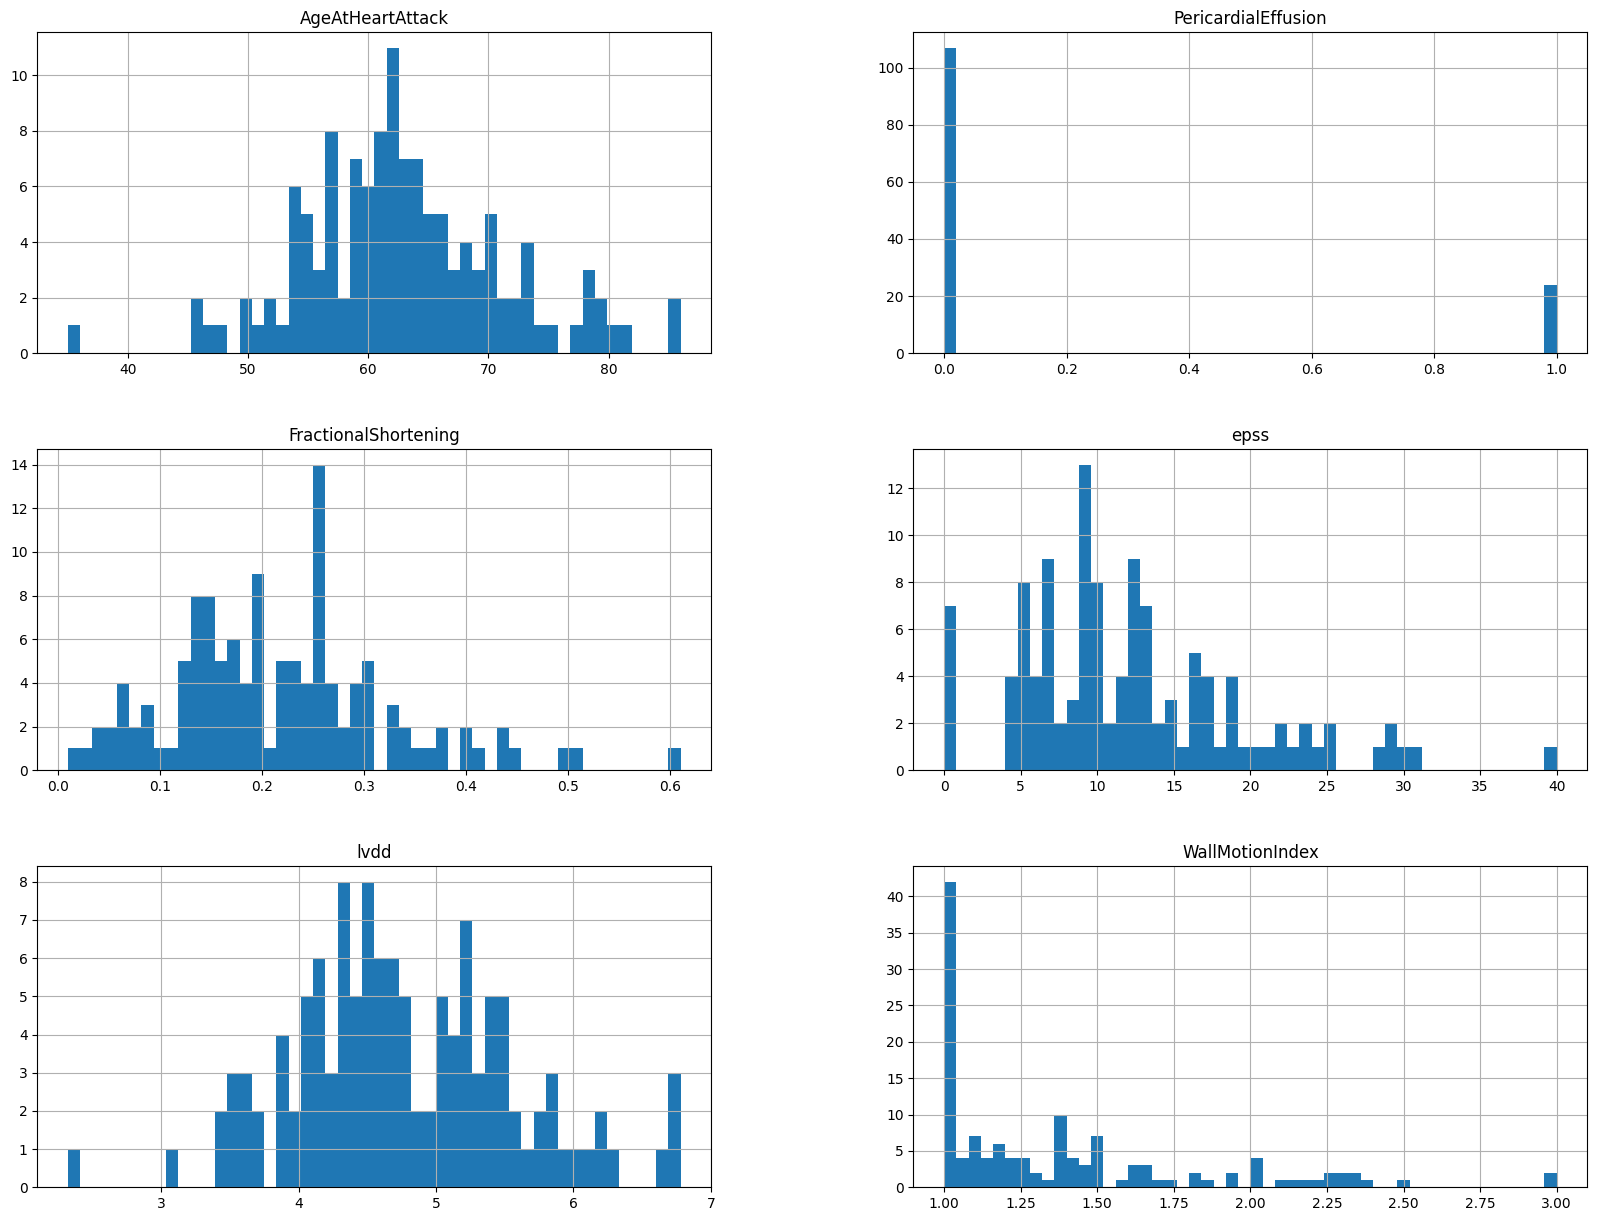

In [21]:
## Plot histogram
train.hist(bins = 50, figsize = (20, 15))

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      126 non-null    float64
 1   PericardialEffusion   131 non-null    int64  
 2   FractionalShortening  124 non-null    float64
 3   epss                  117 non-null    float64
 4   lvdd                  121 non-null    float64
 5   WallMotionIndex       130 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.3 KB


In [23]:
# Remove category attribute and replace missing value with mean
train_e = train.drop(columns = ['PericardialEffusion'])
train_e.fillna(train_e.mean(skipna = True), inplace = True)

# Compute z-scores to examine the outliers
z_scores = (train_e - train_e.mean()) / train_e.std()
check_out = (abs(z_scores) < 3)

print("Total number of data: {}".format(len(train_e)))
print("\nCheck outliers using z-score: ")
print(len(train_e) - check_out.sum())

# Remove the outliers for all columns in the row that outliers occuring
idx = check_out.all(axis = 1)
train_data = train[idx]
target_data = target[idx]

Total number of data: 131

Check outliers using z-score: 
AgeAtHeartAttack        1
FractionalShortening    1
epss                    1
lvdd                    1
WallMotionIndex         2
dtype: int64


#### Comment:
There are outliers in all attribute except in "PericardidalEffusion" because we ignore the category variable before calculate the z-score to capture the outliers. Then, we remove the outliers by delete the entire raw. It also includes in the raw of target dataset.

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 130
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      121 non-null    float64
 1   PericardialEffusion   125 non-null    int64  
 2   FractionalShortening  119 non-null    float64
 3   epss                  111 non-null    float64
 4   lvdd                  116 non-null    float64
 5   WallMotionIndex       124 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.8 KB


In [25]:
## Create pre-process pipeline
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(train_data.columns)
num_attribs.remove("PericardialEffusion")
cat_attribs = ["PericardialEffusion"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = "mean")),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('imputer', SimpleImputer(strategy = "median")),
    ('one hot', OneHotEncoder())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)
])

train_data_tr = full_pipeline.fit_transform(train_data)

# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

In [26]:
## Split data
X_train, X_valid, y_train, y_valid = train_test_split(train_data_tr, target_data, test_size =  0.3, random_state = 42)

## Train logistic regression without L1 and L2 regularisation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Log_reg = LogisticRegression(penalty = 'none')
Log_reg.fit(X_train, y_train)

Log_reg_pred = Log_reg.predict(X_valid)
Log_reg_acc = accuracy_score(Log_reg_pred, y_valid)

print("Logistic Regression without L1 and L2 regularisation:")
print(classification_report(Log_reg_pred, y_valid))

Logistic Regression without L1 and L2 regularisation:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.58      0.54      0.56        13

    accuracy                           0.71        38
   macro avg       0.68      0.67      0.67        38
weighted avg       0.71      0.71      0.71        38



In [27]:
## Train logistic regression with L1 regularisation
Log_reg_w1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.1)
Log_reg_w1.fit(X_train, y_train)

Log_reg_w1_pred = Log_reg_w1.predict(X_valid)
Log_reg_w1_acc = accuracy_score(Log_reg_w1_pred, y_valid)

print("Logistic Regression with L1 regularisation:")
print(classification_report(Log_reg_w1_pred, y_valid))

Logistic Regression with L1 regularisation:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.42      0.71      0.53         7

    accuracy                           0.76        38
   macro avg       0.67      0.74      0.68        38
weighted avg       0.83      0.76      0.78        38



In [28]:
## Train logistic regression with L2 regularisation
Log_reg_w2 = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 0.1)
Log_reg_w2.fit(X_train, y_train)

Log_reg_w2_pred = Log_reg_w2.predict(X_valid)
Log_reg_w2_acc = accuracy_score(Log_reg_w2_pred, y_valid)

print("Logistic Regression with L2 regularisation:")
print(classification_report(Log_reg_w2_pred, y_valid))

Logistic Regression with L2 regularisation:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.33      0.67      0.44         6

    accuracy                           0.74        38
   macro avg       0.63      0.71      0.64        38
weighted avg       0.83      0.74      0.77        38



In [29]:
## Report best performing classifier
best_acc = max(Log_reg_acc, Log_reg_w1_acc, Log_reg_w2_acc)
if best_acc == Log_reg_acc:
    print("The best performing classifier is logistic regression classifiers without L1 and L2 regularisation.")
elif best_acc == Log_reg_w1_acc:
    print("The best performing classifier is logistic regression classifiers with L1 regularisation.")
else:
    print("The best performing classifier is logistic regression classifiers with L2 regularisation.")

The best performing classifier is logistic regression classifiers with L1 regularisation.


# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

In [30]:
## Fix Random Forest Regression model
from sklearn.ensemble import RandomForestClassifier

Forest_cla = RandomForestClassifier()
Forest_cla.fit(X_train, y_train)

Forest_cla_pred = Forest_cla.predict(X_valid)
Forest_cla_acc = accuracy_score(Forest_cla_pred, y_valid)

In [31]:
## Compare and report the best performance
print("Accuracy of Logistic Regression: {:.3f}".format(best_acc))
print("Accuracy of Random Forest Regression: {:.3f}".format(Forest_cla_acc))
if best_acc < Forest_cla_acc:
    print("\nIt seems that Random Forest Classifier has a better performance comparing with Logistic Regression.")
else:
    print("\nIt seems that Logistic Regression has a better performance comparing with Random Forest Classifier.")

Accuracy of Logistic Regression: 0.763
Accuracy of Random Forest Regression: 0.605

It seems that Logistic Regression has a better performance comparing with Random Forest Classifier.


In [32]:
## Report the top five most important/relevant features
Forest_feature_coef = Forest_cla.feature_importances_
Forest_attr = list(train_data.columns)
Forest_feature_imp = sorted(zip(Forest_feature_coef, Forest_attr), reverse = True)

print("Top 5 important features of Random Forest Classifier are")
for i, (imp, fea) in enumerate(Forest_feature_imp[:5]):
    print("{0}. {1}: {2:.3f}".format(i + 1, fea, imp))

Top 5 important features of Random Forest Classifier are
1. lvdd: 0.217
2. epss: 0.201
3. FractionalShortening: 0.194
4. PericardialEffusion: 0.175
5. AgeAtHeartAttack: 0.148
